# California Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/DataSets/CaliforniaHousingPrices/housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.shape

(20640, 10)

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
#Split data
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [11]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
train_data=x_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,NEAR OCEAN,218000.0
11042,-117.82,33.81,19.0,2556.0,304.0,822.0,260.0,9.9055,<1H OCEAN,456900.0
465,-122.28,37.86,52.0,938.0,195.0,393.0,189.0,3.8594,NEAR BAY,196400.0
5685,-118.23,34.24,31.0,3857.0,607.0,1695.0,572.0,7.6420,<1H OCEAN,396400.0
2238,-119.82,36.84,7.0,2289.0,342.0,1077.0,354.0,5.4868,INLAND,158800.0
...,...,...,...,...,...,...,...,...,...,...
10598,-117.80,33.69,15.0,2099.0,322.0,873.0,307.0,7.9887,<1H OCEAN,328000.0
1858,-124.16,41.74,15.0,2715.0,569.0,1532.0,530.0,2.1829,NEAR OCEAN,69500.0
3844,-118.45,34.18,22.0,2516.0,826.0,3350.0,713.0,2.0192,<1H OCEAN,158300.0
13497,-117.33,34.15,28.0,1473.0,333.0,1196.0,312.0,1.6993,INLAND,67800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

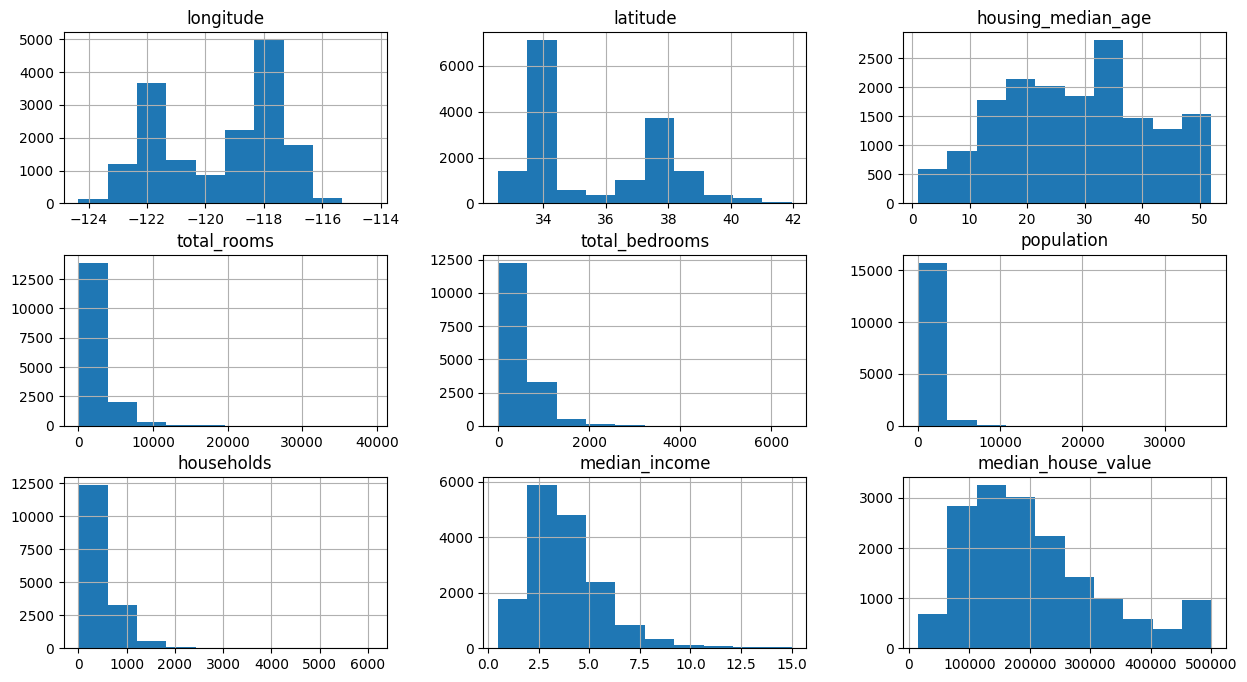

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
import seaborn as sns

<Axes: >

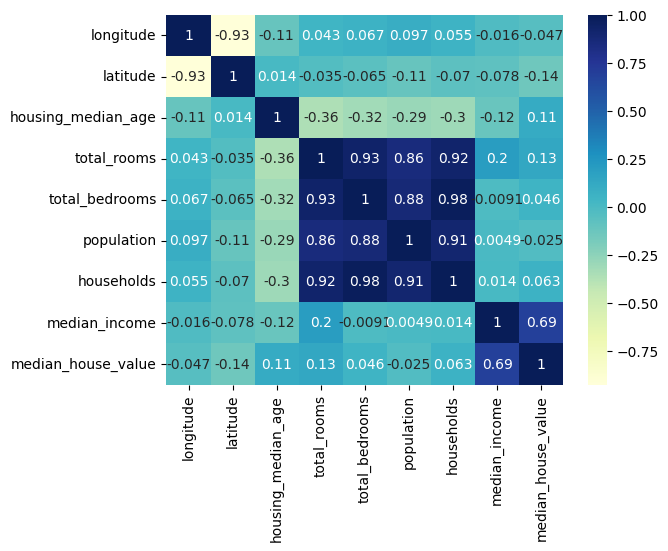

In [18]:

sns.heatmap(train_data.drop(['ocean_proximity'],axis=1).corr(),annot=True,cmap='YlGnBu')

Median income and median house value are highly positively corelated
And latitude value and median house value are highly negatively corelated

In [19]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

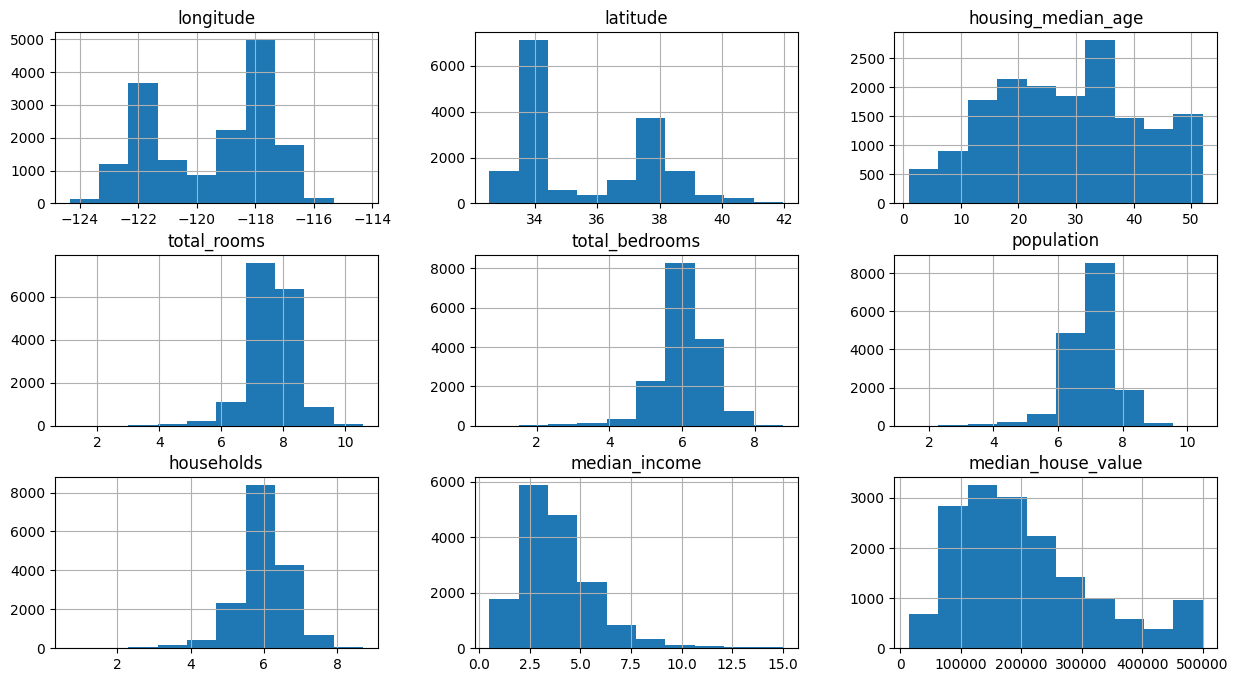

In [20]:
train_data.hist(figsize=(15,8))
#now we get a gaussian curve

In [21]:
#Now we are gonna one hot encode ocean proximity
train_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,7233
INLAND,5193
NEAR OCEAN,2123
NEAR BAY,1793
ISLAND,4


In [22]:
pd.get_dummies(train_data.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20198,0,0,0,0,1
11042,1,0,0,0,0
465,0,0,0,1,0
5685,1,0,0,0,0
2238,0,1,0,0,0
...,...,...,...,...,...
10598,1,0,0,0,0
1858,0,0,0,0,1
3844,1,0,0,0,0
13497,0,1,0,0,0


In [23]:
train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20198,-119.19,34.26,16.0,8.520986,6.749931,7.833996,6.722630,5.1752,NEAR OCEAN,218000.0,0,0,0,0,1
11042,-117.82,33.81,19.0,7.846590,5.720312,6.712956,5.564520,9.9055,<1H OCEAN,456900.0,1,0,0,0,0
465,-122.28,37.86,52.0,6.844815,5.278115,5.976351,5.247024,3.8594,NEAR BAY,196400.0,0,0,0,1,0
5685,-118.23,34.24,31.0,8.257904,6.410175,7.436028,6.350886,7.6420,<1H OCEAN,396400.0,1,0,0,0,0
2238,-119.82,36.84,7.0,7.736307,5.837730,6.982863,5.872118,5.4868,INLAND,158800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,-117.80,33.69,15.0,7.649693,5.777652,6.773080,5.730100,7.9887,<1H OCEAN,328000.0,1,0,0,0,0
1858,-124.16,41.74,15.0,7.906915,6.345636,7.334982,6.274762,2.1829,NEAR OCEAN,69500.0,0,0,0,0,1
3844,-118.45,34.18,22.0,7.830823,6.717805,8.117014,6.570883,2.0192,<1H OCEAN,158300.0,1,0,0,0,0
13497,-117.33,34.15,28.0,7.295735,5.811141,7.087574,5.746203,1.6993,INLAND,67800.0,0,1,0,0,0


In [24]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'],axis=1)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20198,-119.19,34.26,16.0,8.520986,6.749931,7.833996,6.722630,5.1752,218000.0,0,0,0,0,1
11042,-117.82,33.81,19.0,7.846590,5.720312,6.712956,5.564520,9.9055,456900.0,1,0,0,0,0
465,-122.28,37.86,52.0,6.844815,5.278115,5.976351,5.247024,3.8594,196400.0,0,0,0,1,0
5685,-118.23,34.24,31.0,8.257904,6.410175,7.436028,6.350886,7.6420,396400.0,1,0,0,0,0
2238,-119.82,36.84,7.0,7.736307,5.837730,6.982863,5.872118,5.4868,158800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10598,-117.80,33.69,15.0,7.649693,5.777652,6.773080,5.730100,7.9887,328000.0,1,0,0,0,0
1858,-124.16,41.74,15.0,7.906915,6.345636,7.334982,6.274762,2.1829,69500.0,0,0,0,0,1
3844,-118.45,34.18,22.0,7.830823,6.717805,8.117014,6.570883,2.0192,158300.0,1,0,0,0,0
13497,-117.33,34.15,28.0,7.295735,5.811141,7.087574,5.746203,1.6993,67800.0,0,1,0,0,0


<Axes: >

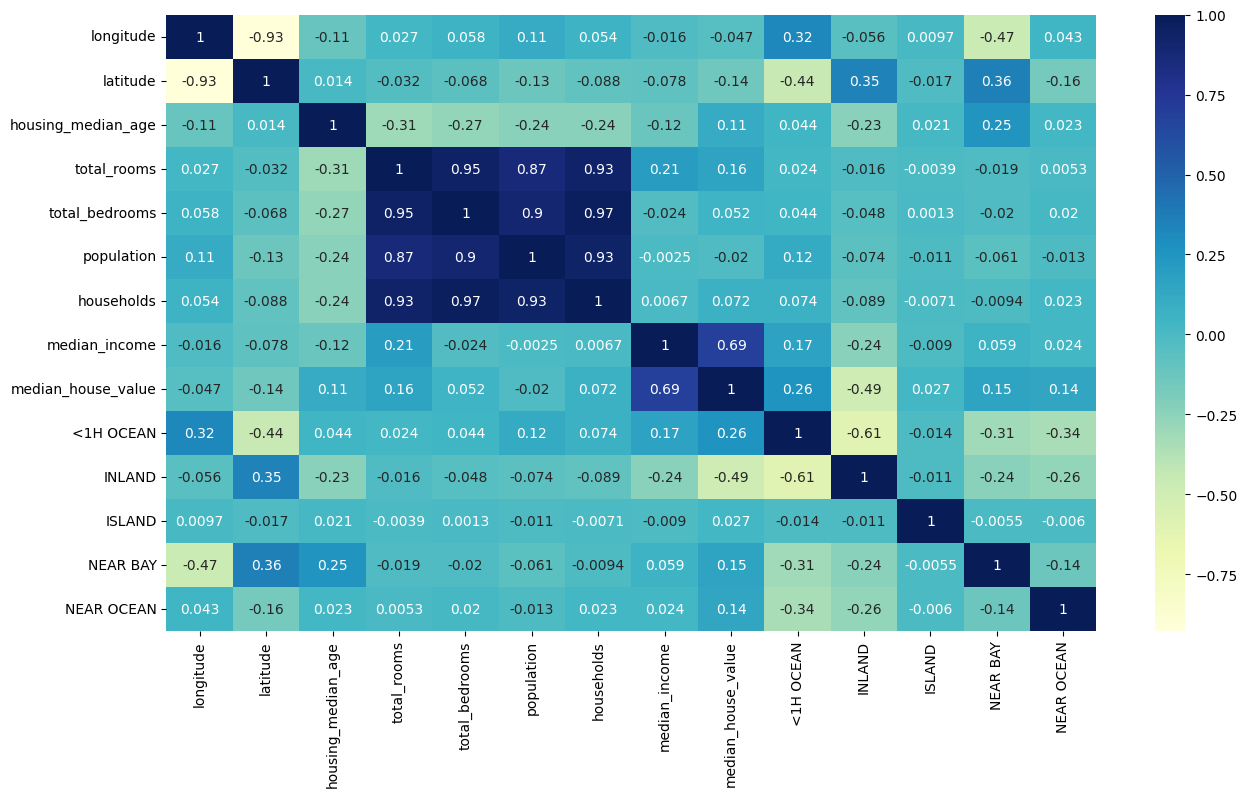

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

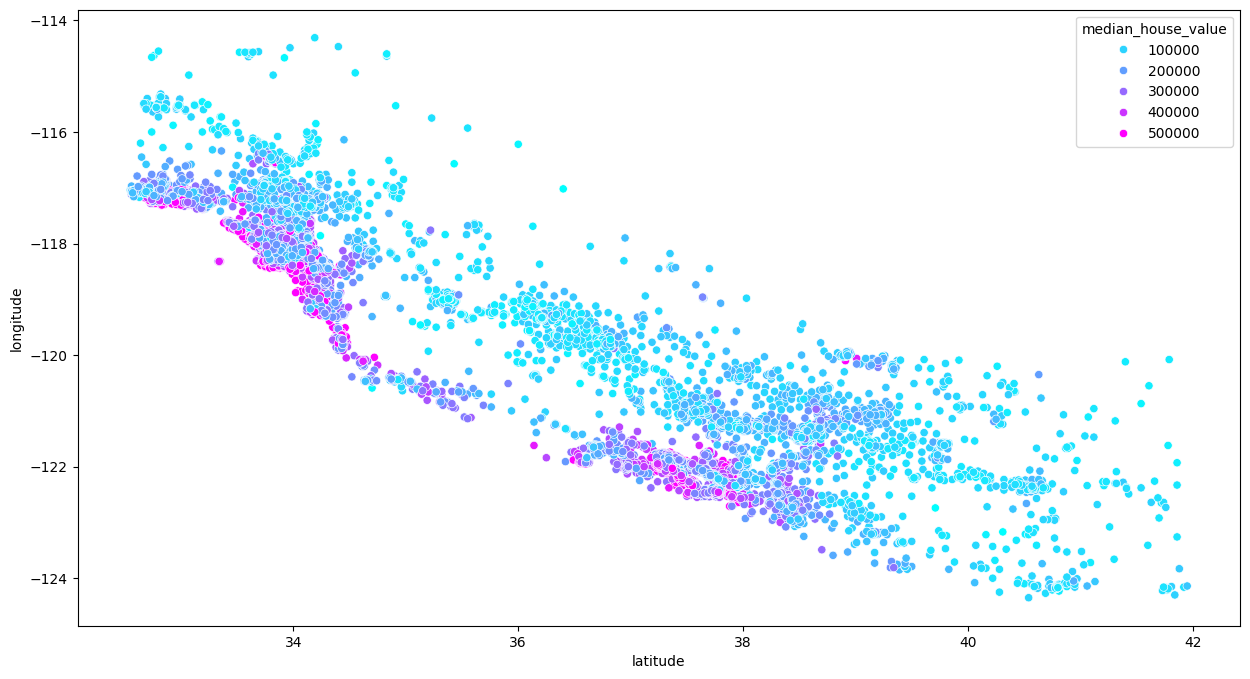

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='cool')

In [28]:
#Feature Engineering
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

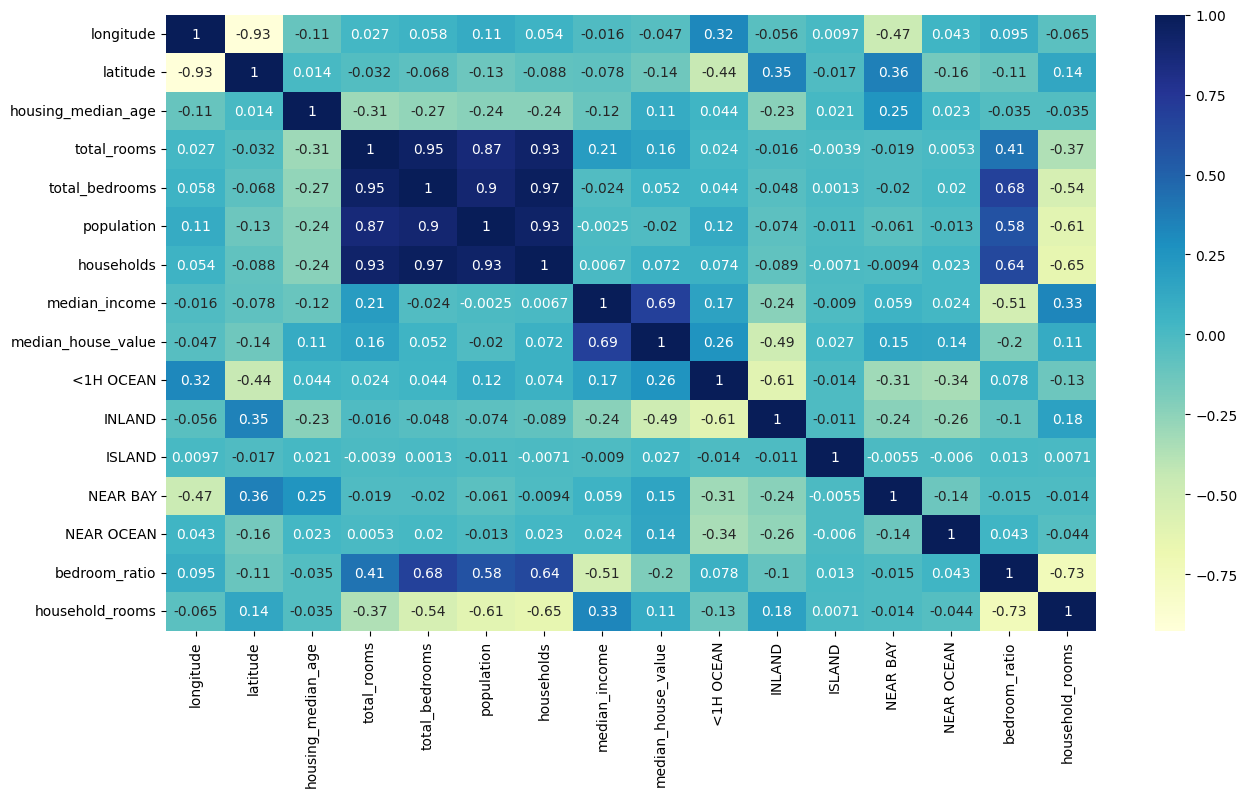

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [30]:
#MOdel 1: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)

reg=LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [31]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [32]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
4012,-118.60,34.16,37.0,8.143808,6.371612,7.157735,6.300786,4.1656,313100.0,True,False,False,False,False,0.782387,1.292507
5357,-118.39,34.05,42.0,8.041091,6.327937,7.134094,6.276643,5.2220,500001.0,True,False,False,False,False,0.786950,1.281113
18156,-122.06,37.36,35.0,7.898782,6.202536,7.203406,6.122493,6.0777,327500.0,True,False,False,False,False,0.785252,1.290125
13197,-117.70,34.07,33.0,7.347944,5.666427,7.190676,5.717028,3.7969,128400.0,False,True,False,False,False,0.771158,1.285273
7537,-118.21,33.91,24.0,7.343426,5.971262,7.499977,5.963579,2.6429,105300.0,True,False,False,False,False,0.813144,1.231379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5014,-118.32,34.00,50.0,8.086718,6.542472,7.741099,6.516193,1.9500,112600.0,True,False,False,False,False,0.809039,1.241019
7960,-118.18,33.88,42.0,7.752335,6.222576,7.513709,6.218600,3.1713,161000.0,True,False,False,False,False,0.802671,1.246637
18627,-121.96,37.10,20.0,6.827629,5.049856,5.891644,4.912655,6.3617,331500.0,True,False,False,False,False,0.739621,1.389804
13551,-117.31,34.11,38.0,7.097549,5.774552,7.111512,5.762051,1.4663,64000.0,False,True,False,False,False,0.813598,1.231775


In [33]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [34]:
x_test_s=scaler.transform(x_test)

In [35]:
reg.score(x_test_s,y_test)

0.6728730668988396

## Random FOrest

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
forest.score(x_test,y_test)

0.8228954723514113

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [39]:
forest.score(x_test_s,y_test)

0.8236541145099306

Lets get it higher

In [50]:
# gridsearch with cross validation

forest=RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4],
    "max_depth":[None,4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
best_forest=grid_search.best_estimator_

In [55]:
best_forest.score(x_test_s,y_test)

0.8251833458349991